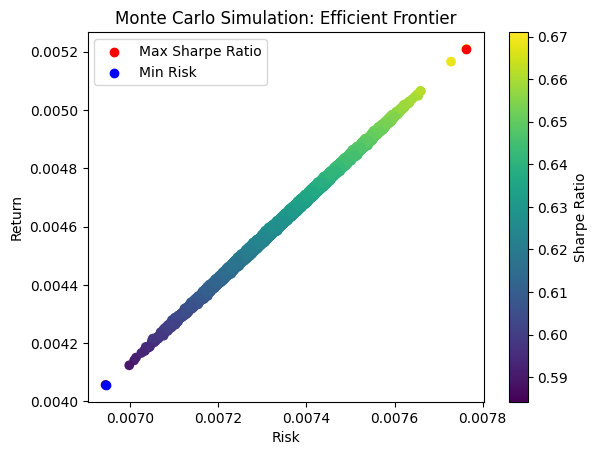

Portfolio with Maximum Sharpe Ratio:
Company MMM     0.002249
Company AOS     0.003308
Company ABT     0.000061
Company ABBV    0.003961
Company ACN     0.002016
                  ...   
Company XYL     0.001635
Company YUM     0.004035
Company ZBRA    0.002836
Company ZBH     0.003155
Company ZTS     0.001524
Name: 37315, Length: 499, dtype: float64
Return    0.005209
Risk      0.007763
Sharpe    0.671039
Name: 37315, dtype: float64

Portfolio with Minimum Risk:
Company MMM     0.002942
Company AOS     0.002889
Company ABT     0.003701
Company ABBV    0.002845
Company ACN     0.000152
                  ...   
Company XYL     0.003227
Company YUM     0.000993
Company ZBRA    0.002981
Company ZBH     0.000581
Company ZTS     0.003579
Name: 67779, Length: 499, dtype: float64
Return    0.004057
Risk      0.006943
Sharpe    0.584257
Name: 67779, dtype: float64


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_predictions=pd.read_csv('predictions_each_company.csv')
companies_names=list(df_predictions['Company'])
n_companies=df_predictions.shape[0]
n_days=21

returns_matrix=np.zeros((n_companies,n_days-1))

for i in range(n_companies):
    predicted_prices= df_predictions.iloc[i,2:].values
    returns= (predicted_prices[1:] - predicted_prices[:-1])/ predicted_prices[:-1]
    returns_matrix[i]= returns

expected_returns= np.mean(returns_matrix, axis=1)
cov_matrix=np.cov(returns_matrix)


# Monte Carlo Simulation
n_portfolios = 100_000
results = np.zeros((n_portfolios, 3))  # Columns: return, risk, Sharpe ratio
weights_record = []

for i in range(n_portfolios):
    # Generate random weights
    weights = np.random.random(n_companies)
    weights /= np.sum(weights)  # weights sum up to 1
    weights_record.append(weights)
    
    # Portfolio return and risk
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_risk  
    
    # Store results
    results[i, 0] = portfolio_return
    results[i, 1] = portfolio_risk
    results[i, 2] = sharpe_ratio

# Store data in  DataFrame
results_df = pd.DataFrame(results, columns=['Return', 'Risk', 'Sharpe'])
weights_df = pd.DataFrame(weights_record, columns=[f'Company {name}' for name in companies_names])

# Get the best portfolios
max_sharpe_idx = results_df['Sharpe'].idxmax()  # Maximum Sharpe ratio
min_risk_idx = results_df['Risk'].idxmin()  # Minimum risk

# Plot Efficient Frontier
plt.scatter(results_df['Risk'], results_df['Return'], c=results_df['Sharpe'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(results_df.loc[max_sharpe_idx, 'Risk'], results_df.loc[max_sharpe_idx, 'Return'], color='red', label='Max Sharpe Ratio')
plt.scatter(results_df.loc[min_risk_idx, 'Risk'], results_df.loc[min_risk_idx, 'Return'], color='blue', label='Min Risk')
plt.title('Monte Carlo Simulation: Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.legend()
plt.show()

# Display optimal portfolios
print("Portfolio with Maximum Sharpe Ratio:")
print(weights_df.loc[max_sharpe_idx])
print(results_df.loc[max_sharpe_idx])

print("\nPortfolio with Minimum Risk:")
print(weights_df.loc[min_risk_idx])
print(results_df.loc[min_risk_idx])
